In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [3]:
df = pd.read_csv('Killed or Seriously Injured (KSI) from 20062021.csv')
df.columns
print(df.shape)


(17488, 57)


In [4]:
weekDaysMapping = ("Monday", "Tuesday",
               "Wednesday", "Thursday",
               "Friday", "Saturday",
               "Sunday")
    
df['DATE'] = pd.to_datetime(df.DATE.str[:10], format="%Y/%m/%d")
df['weekday'] = df.apply(lambda x: weekDaysMapping[x.DATE.weekday()], axis = 1)
df['FATAL'] = df['ACCLASS'].map({'Non-Fatal Injury': 'No',
                                     'Property Damage Only': 'No',
                                     'Fatal': 'Yes'}).fillna('Yes')

for attribute in ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 
                  'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 
                  'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']:
    df[attribute] = df[attribute].map({'Yes': 1,
                                           '': 0}).fillna(0).astype(int)
irr_columns = ['X', 'Y', 'INDEX_', 'STREET1' , 'STREET2', 'OFFSET', 'ACCLOC',
               'FATAL_NO','INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT','DRIVCOND',
               'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
              'HOOD_158', 'NEIGHBOURHOOD_158',  'HOOD_140', 'NEIGHBOURHOOD_140', 
               'ObjectId', 'ACCLASS']

    
df = df.drop(irr_columns, axis = 1)
df['month_yy'] = df.apply(lambda x: x['DATE'].replace(day=1), axis = 1)
print(df.shape)    


(17488, 35)


Text(0.5, 1.0, 'LONGITUDE/LATITUDE of accident location')

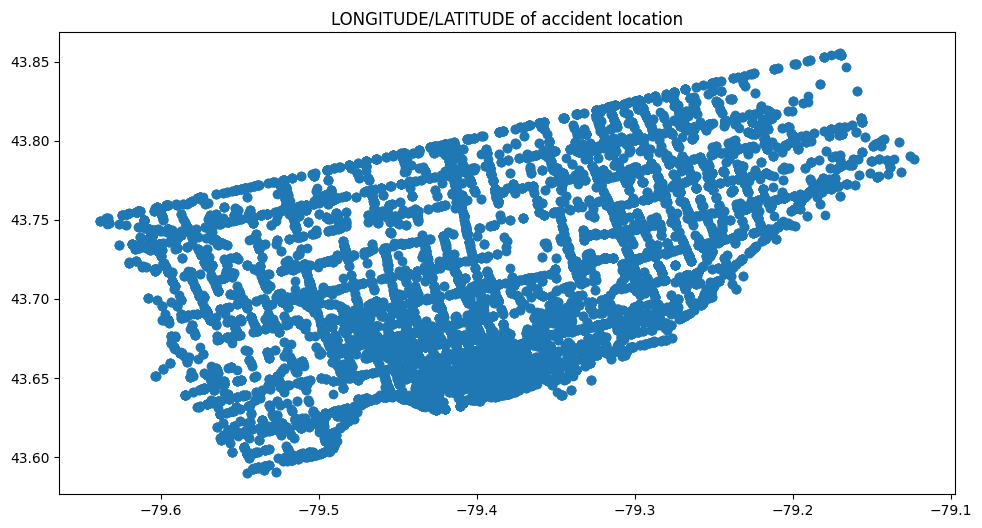

In [5]:
fig, ax = plt.subplots(figsize=(15,6))
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry=geometry)   
gdf.plot(ax=ax)
plt.title('LONGITUDE/LATITUDE of accident location')

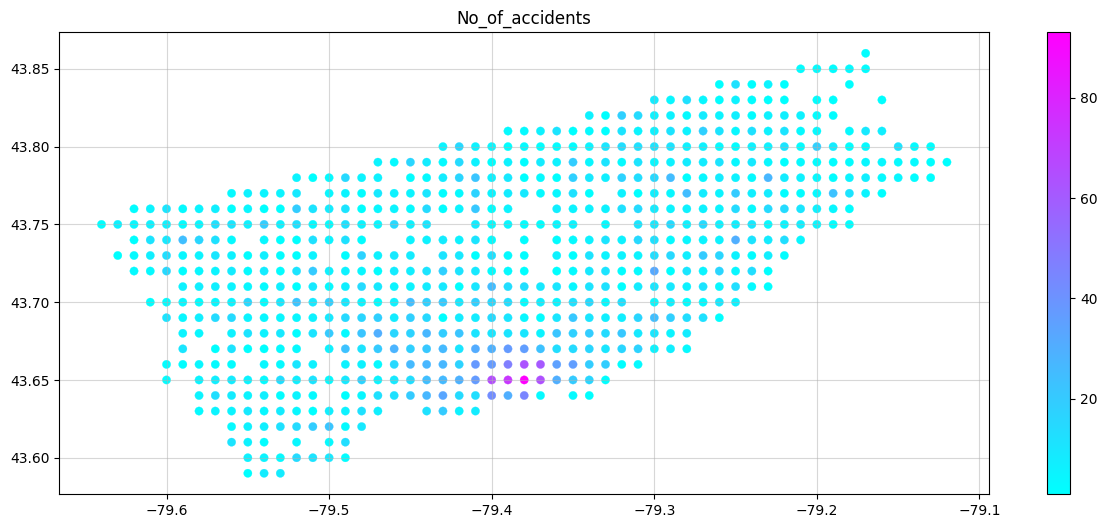

In [6]:
df1 = df.copy()
df1['LATITUDE'] = df1['LATITUDE'].round(2)
df1['LONGITUDE'] = df1['LONGITUDE'].round(2)

fdf =df1.groupby(['LATITUDE','LONGITUDE'])['ACCNUM'].agg(['count', 'nunique']).reset_index()
fdf.columns = ['LATITUDE','LONGITUDE', 'No_of_affected_people','No_of_accidents']
fdf

fig, ax = plt.subplots(figsize=(15,6))
geometry = [Point(xy) for xy in zip(fdf['LONGITUDE'], fdf['LATITUDE'])]
gdf = GeoDataFrame(fdf, geometry=geometry)   
plt.scatter(x = fdf['LONGITUDE'], y =  fdf['LATITUDE'],
        c=fdf["No_of_accidents"], cmap="cool",linewidth=.2)
plt.title('No_of_accidents')
ax.grid(alpha=0.5) 
plt.colorbar()
plt.show()

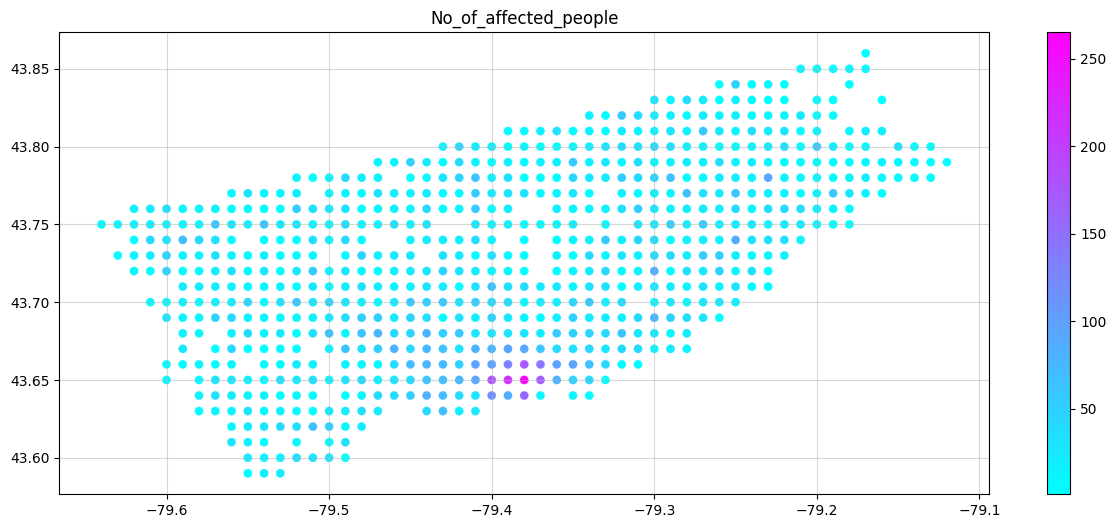

In [7]:
df1 = df.copy()
df1['LATITUDE'] = df1['LATITUDE'].round(2)
df1['LONGITUDE'] = df1['LONGITUDE'].round(2)

fdf =df1.groupby(['LATITUDE','LONGITUDE'])['ACCNUM'].agg(['count', 'nunique']).reset_index()
fdf.columns = ['LATITUDE','LONGITUDE', 'No_of_affected_people','No_of_accidents']
fdf

fig, ax = plt.subplots(figsize=(15,6))
geometry = [Point(xy) for xy in zip(fdf['LONGITUDE'], fdf['LATITUDE'])]
gdf = GeoDataFrame(fdf, geometry=geometry)   
plt.scatter(x = fdf['LONGITUDE'], y =  fdf['LATITUDE'],
        c=fdf["No_of_affected_people"], cmap="cool",linewidth=.2)
plt.title('No_of_affected_people')
ax.grid(alpha=0.5) 
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Scatter plot between count of affected people and count of accidents')

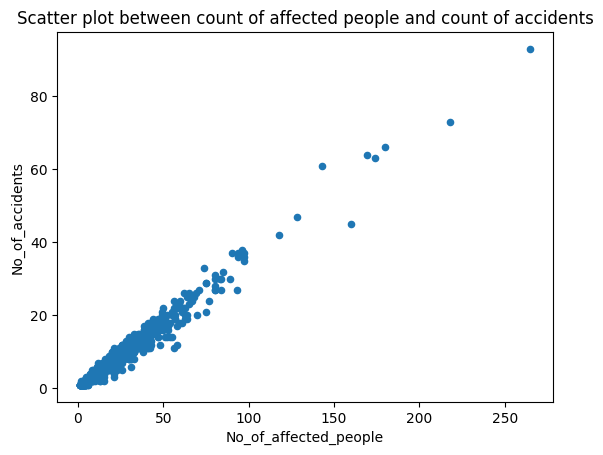

In [8]:
fdf.plot(x = "No_of_affected_people" , y = 'No_of_accidents', kind = 'scatter')
plt.title('Scatter plot between count of affected people and count of accidents')

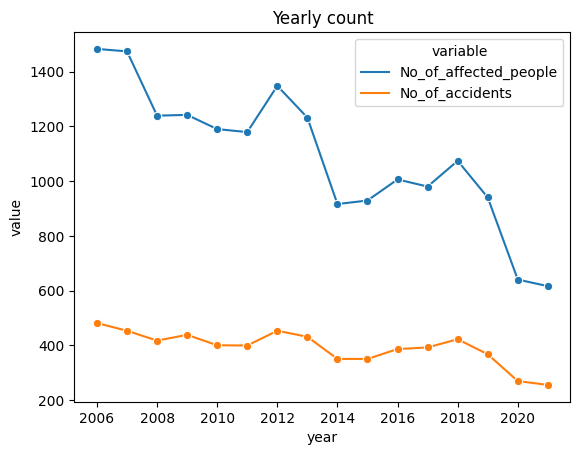

In [9]:
fdf =df.groupby('YEAR')['ACCNUM'].agg(['count', 'nunique']).reset_index()
fdf.columns = ['year', 'No_of_affected_people','No_of_accidents']

sns.lineplot(x='year', y='value',hue='variable', 
             data=pd.melt(fdf, ['year']),
             marker='o'
            )
plt.title('Yearly count')
plt.show()

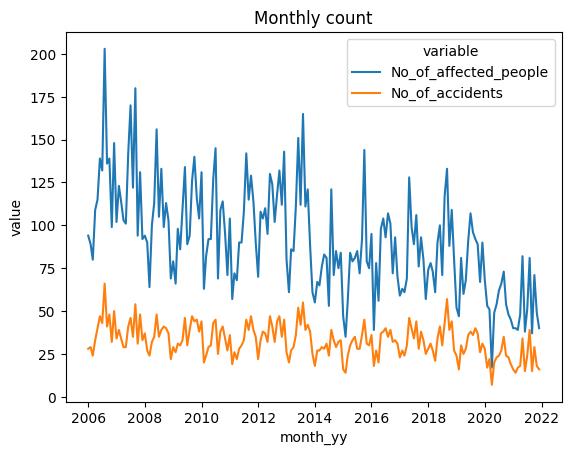

In [10]:
fdf = df.groupby('month_yy')['ACCNUM'].agg(['count', 'nunique']).reset_index()
fdf.columns = ['month_yy', 'No_of_affected_people','No_of_accidents']

sns.lineplot(x='month_yy', y='value',hue='variable', 
             data=pd.melt(fdf, ['month_yy'])) 

plt.title('Monthly count')
plt.show()

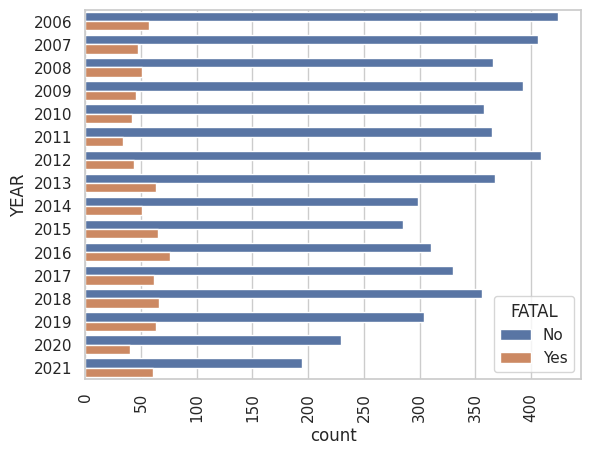

In [11]:
sns.set_theme(style="whitegrid")

sns.countplot(data=df.drop_duplicates(['YEAR', 'ACCNUM']), y="YEAR", hue="FATAL")
plt.xticks(rotation=90)
plt.show()

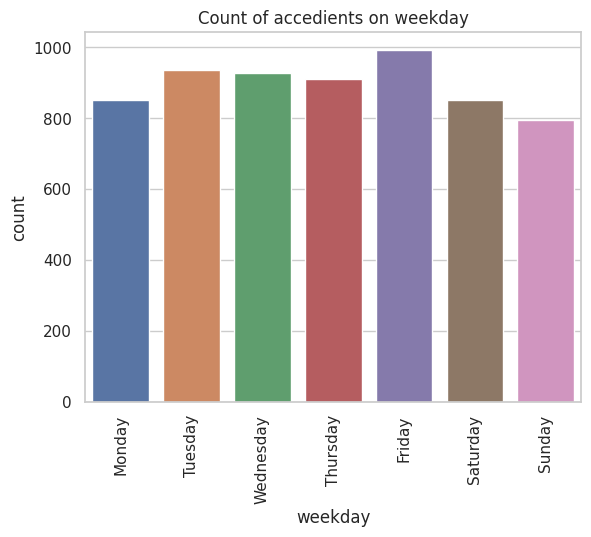

In [12]:
sns.set_theme(style="whitegrid")

sns.countplot(data=df.drop_duplicates(['YEAR', 'ACCNUM']), x="weekday", order = weekDaysMapping)
plt.xticks(rotation=90)
plt.title('Count of accedients on weekday')
plt.show()

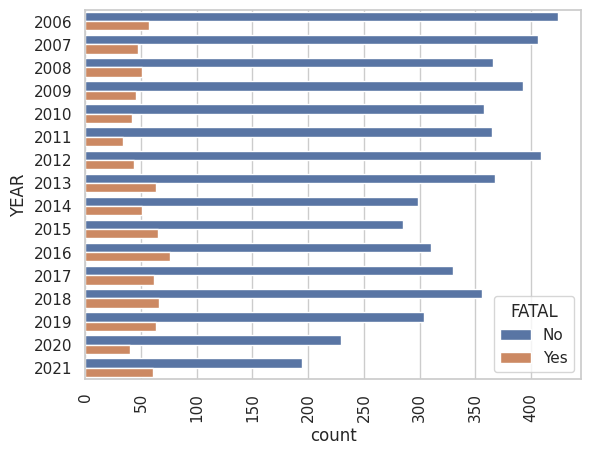

In [13]:
sns.set_theme(style="whitegrid")

sns.countplot(data=df.drop_duplicates(['YEAR', 'ACCNUM']), y="YEAR", hue="FATAL")
plt.xticks(rotation=90)
plt.show()

In [14]:
weather_df = pd.read_csv('Toronto_temp.csv')
weather_df.head()

weather_df['DATE'] = pd.to_datetime(weather_df['Date/Time'], format="%d-%b-%y")
weather_df = weather_df.drop(['Date/Time', 'Year','Month','Day'] , axis = 1)
weather_df = weather_df.sort_values('DATE')
print(min(df.DATE))
print(max(df.DATE))

print(min(weather_df.DATE))
print(max(weather_df.DATE))

weather_df = weather_df[(weather_df.DATE <= max(df.DATE)) & 
                             (weather_df.DATE >= min(df.DATE))
                             ]


weather_df.tail()

2006-01-01 00:00:00
2021-12-26 00:00:00
1969-01-01 00:00:00
2068-12-01 00:00:00


,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season,DATE
2422,0.0,3.0,-3.0,0.0,0.0,0.0,Fall,2018-11-10
2421,1.0,4.0,-3.0,0.0,0.0,0.0,Fall,2018-11-11
2420,4.0,6.0,1.0,1.0,0.0,1.0,Fall,2018-11-12
2419,-1.0,2.0,-4.0,1.0,0.0,1.0,Fall,2018-11-13
2418,-2.0,1.0,-6.0,0.0,0.0,0.0,Fall,2018-11-14


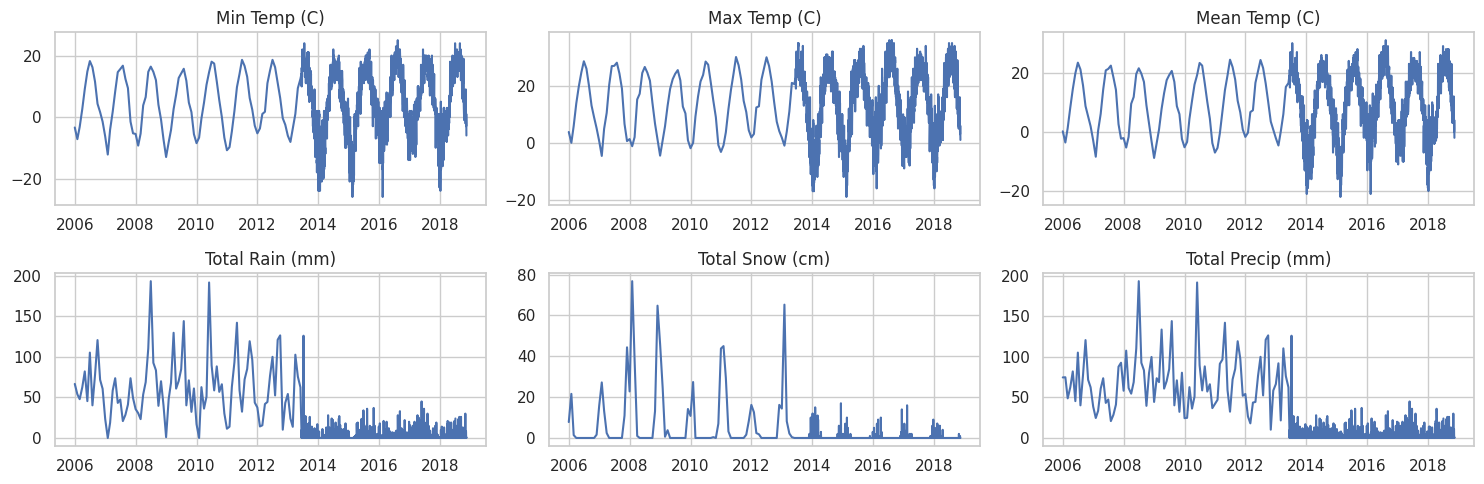

In [15]:
#weather_df = weather_df[(weather_df.DATE >= '2013-06-13')]

fig, axs = plt.subplots(2, 3, figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.plot(weather_df['DATE'], weather_df['Min Temp (C)'])
plt.title('Min Temp (C)')
plt.subplot(2, 3, 2)
plt.plot(weather_df['DATE'], weather_df['Max Temp (C)'])
plt.title('Max Temp (C)')
plt.subplot(2, 3, 3)
plt.plot(weather_df['DATE'], weather_df['Mean Temp (C)'])
plt.title('Mean Temp (C)')
plt.subplot(2, 3, 4)
plt.plot(weather_df['DATE'], weather_df['Total Rain (mm)'])
plt.title('Total Rain (mm)')
plt.subplot(2, 3, 5)
plt.plot(weather_df['DATE'], weather_df['Total Snow (cm)'])
plt.title('Total Snow (cm)')
plt.subplot(2, 3, 6)
plt.plot(weather_df['DATE'], weather_df['Total Precip (mm)'])
plt.title('Total Precip (mm)')
plt.tight_layout()
plt.show()

<ipython-input-16-c36d201b8169>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = weather_df.corr().round(2)


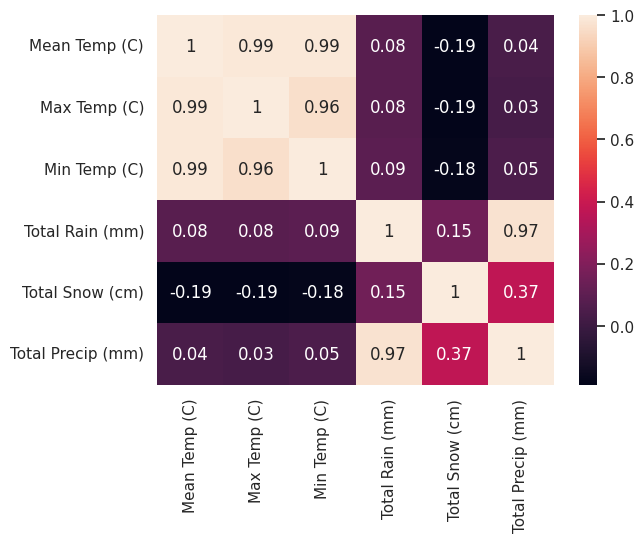

In [16]:
matrix = weather_df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [17]:
col= ['DATE', 'Mean Temp (C)',  'Total Rain (mm)','Total Snow (cm)','season' ]
weather_df = weather_df[col]
weather_df = weather_df[(weather_df.DATE >= '2013-06-13')]
weather_df.head()

,DATE,Mean Temp (C),Total Rain (mm),Total Snow (cm),season
1303,2013-06-13,19.0,11.0,0.0,Summer
1302,2013-06-14,18.0,0.0,0.0,Summer
1301,2013-06-15,18.0,0.0,0.0,Summer
1300,2013-06-16,21.0,10.0,0.0,Summer
1299,2013-06-17,20.0,0.0,0.0,Summer


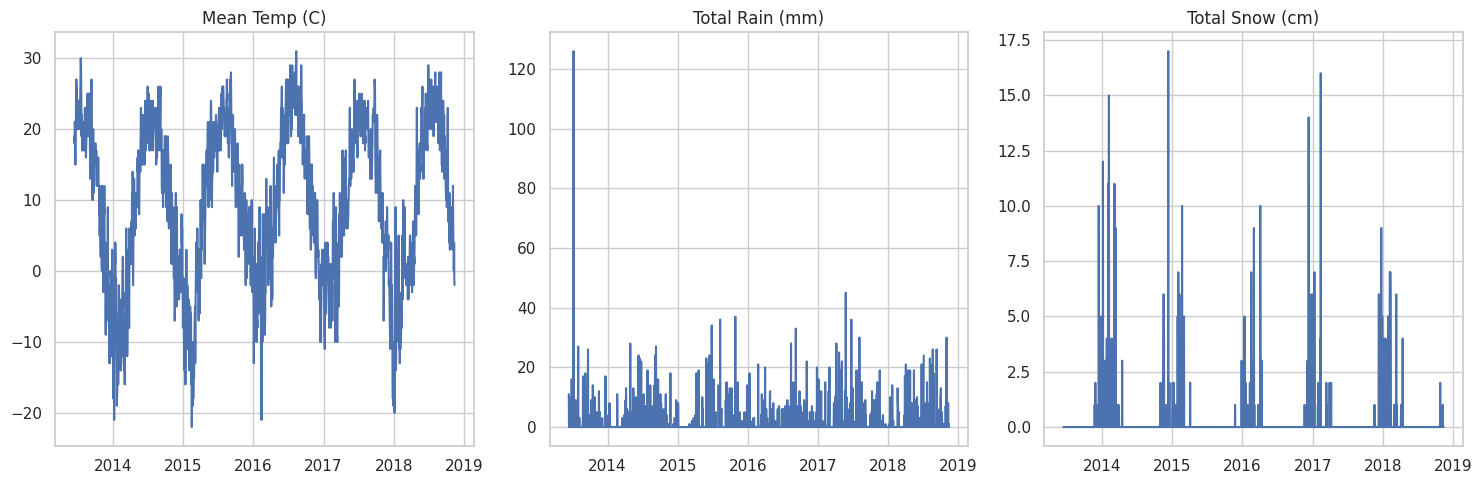

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(weather_df['DATE'], weather_df['Mean Temp (C)'])
plt.title('Mean Temp (C)')
plt.subplot(1, 3, 2)
plt.plot(weather_df['DATE'], weather_df['Total Rain (mm)'])
plt.title('Total Rain (mm)')
plt.subplot(1, 3, 3)
plt.plot(weather_df['DATE'], weather_df['Total Snow (cm)'])
plt.title('Total Snow (cm)')
plt.tight_layout()
plt.show()

<ipython-input-19-594e554f56dd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = all_df.corr().round(2)


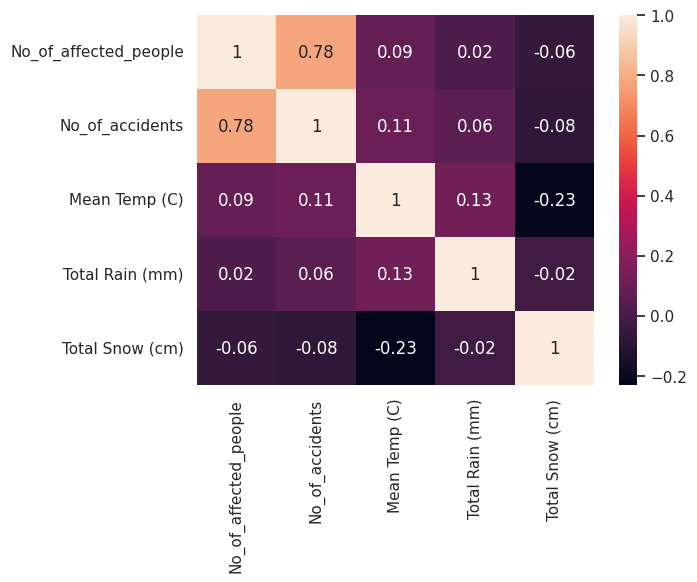

In [19]:
fdf = df.groupby('DATE')['ACCNUM'].agg(['count', 'nunique']).reset_index()
fdf.columns = ['DATE', 'No_of_affected_people','No_of_accidents']
fdf.head()
all_df = fdf.merge(weather_df, on = 'DATE')
matrix = all_df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

<ipython-input-20-72470c7e28e9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = all_df.corr().round(2)


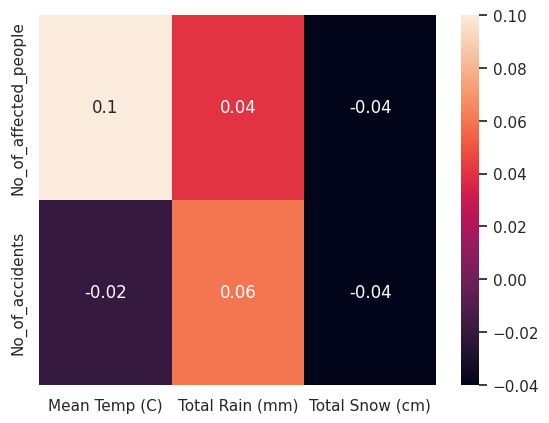

In [20]:
fdf = df[df.FATAL == 'Yes'].groupby('DATE')['ACCNUM'].agg(['count', 'nunique']).reset_index()
fdf.columns = ['DATE', 'No_of_affected_people','No_of_accidents']
fdf.head()
all_df = fdf.merge(weather_df, on = 'DATE')
matrix = all_df.corr().round(2)
sns.heatmap(matrix.iloc[0:2,2:], annot=True)
plt.show()

In [21]:
all_df.head()

,DATE,No_of_affected_people,No_of_accidents,Mean Temp (C),Total Rain (mm),Total Snow (cm),season
0,2013-06-16,1,1,21.0,10.0,0.0,Summer
1,2013-07-03,15,2,22.0,1.0,0.0,Summer
2,2013-07-05,2,1,NaN,NaN,NaN,Summer
3,2013-07-08,3,1,24.0,126.0,0.0,Summer
4,2013-07-11,3,1,21.0,0.0,0.0,Summer


<ipython-input-22-40357ea94b8e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_df.groupby('season')['No_of_affected_people','No_of_accidents'].mean().plot(kind = 'bar')


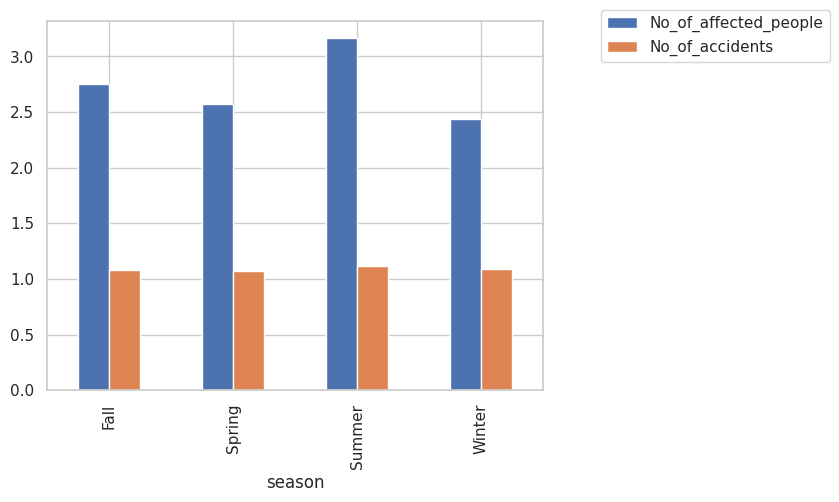

In [22]:
all_df.groupby('season')['No_of_affected_people','No_of_accidents'].mean().plot(kind = 'bar')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [23]:
max(weather_df.DATE)

Timestamp('2018-11-14 00:00:00')